# Task 05: Sports - Exploratory Data Analysis

## Author: Rupali Shekhawat

### Problem Statement: Performing ‘Exploratory Data Analysis’ on dataset ‘Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’’. The dataset is taken from: https://bit.ly/34SRn3b


### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')

### Top 5 rows of the dataset

In [3]:
matches_df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries_df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Finding the shape of the dataset

In [5]:
matches_df.shape

(756, 18)

In [6]:
deliveries_df.shape

(179078, 21)

### Full summary of the dataframe

In [7]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Finding the data types in the Dataset

In [9]:
matches_df.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [10]:
deliveries_df.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

### Finding all the column names

In [11]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [12]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

### Finding statistical values

In [13]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [14]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### Correlation

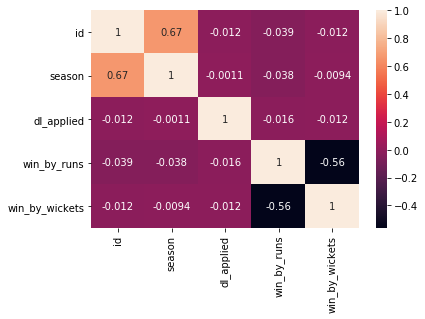

In [15]:
figure_1=matches_df.corr()
sns.heatmap(figure_1,annot=True)

### Finding total number of null values in the dataset

In [16]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [17]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Heatmap showing null values

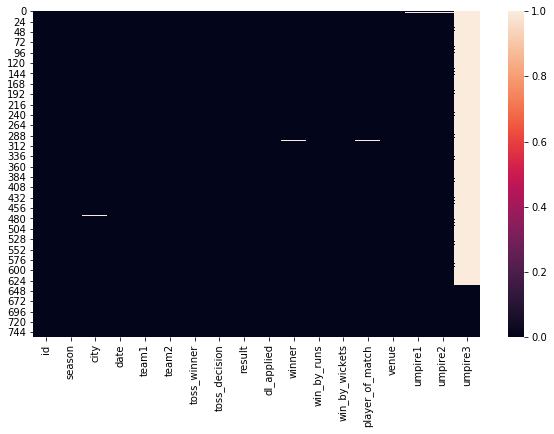

In [18]:
plt.figure(figsize= (10,6))
sns.heatmap(matches_df.isnull(),cbar = True)

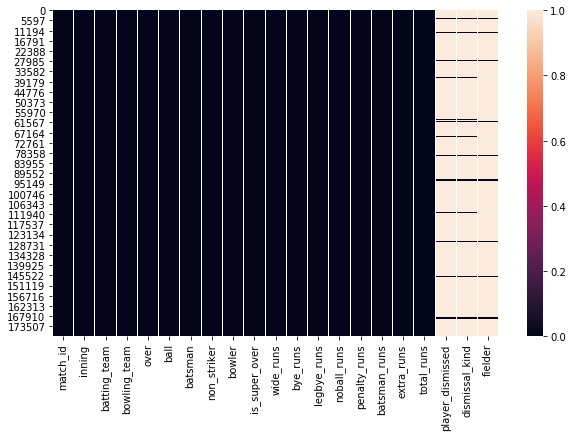

In [19]:
plt.figure(figsize= (10,6))
sns.heatmap(deliveries_df.isnull(),cbar = True)

### Dropping redundant value

In [20]:
#Dropping Umpire3 from the dataset
matches_df.drop('umpire3', axis= 'columns', inplace =True)
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


### Total no. of matches in the dataset

In [21]:
matches_df['id'].max()

11415

### Seasons in the dataset

In [22]:
#Unique seasons
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [23]:
#Total no. of seasons
len(matches_df.season.unique())

12

### Teams playing in these seasons

In [24]:
np.unique(matches_df[['team1','team2']].values)

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object)

### Finding Sum

In [25]:
print('Total number of Matches played :',len(deliveries_df['match_id'].unique()))
print('Total number of RUNS SCORED by the batsman :',deliveries_df.total_runs.sum())
print('Total number of WIDE RUNS :',deliveries_df.wide_runs.sum())
print('Total number of NO-BALL RUNS :',deliveries_df.noball_runs.sum())
print('Total number of BYE RUNS :',deliveries_df.bye_runs.sum())
print('Total number of LEG-BYE RUNS :',deliveries_df.legbye_runs.sum())
print('Total number of PENALTY RUNS :',deliveries_df.penalty_runs.sum())
print('Total number of BATSMAN RUNS :',deliveries_df.batsman_runs.sum())
print('Total number of SUPER OVERS :',deliveries_df[deliveries_df.is_super_over==1].match_id.nunique())

Total number of Matches played : 756
Total number of RUNS SCORED by the batsman : 235290
Total number of WIDE RUNS : 6576
Total number of NO-BALL RUNS : 749
Total number of BYE RUNS : 884
Total number of LEG-BYE RUNS : 3785
Total number of PENALTY RUNS : 10
Total number of BATSMAN RUNS : 223286
Total number of SUPER OVERS : 7


### Maximum & mininum runs made by a team

In [26]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

In [27]:
matches_df.iloc[matches_df['win_by_runs'].idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

### Team which won by maximum & mininum runs

In [28]:
matches_df.iloc[matches_df['win_by_runs'].idxmax]['winner']

'Mumbai Indians'

In [29]:
matches_df.iloc[matches_df['win_by_runs'].idxmin]['winner']

'Rising Pune Supergiant'

### Team which won by maximum & mininum wickets

In [30]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax]['winner']

'Kolkata Knight Riders'

In [31]:
matches_df.iloc[matches_df['win_by_wickets'].idxmin]['winner']

'Sunrisers Hyderabad'

### Venues

In [32]:
city_venue = matches_df.groupby(['city','venue']).count()['season']
city_venue

city            venue                                               
Abu Dhabi       Sheikh Zayed Stadium                                     7
Ahmedabad       Sardar Patel Stadium, Motera                            12
Bangalore       M Chinnaswamy Stadium                                   66
Bengaluru       M Chinnaswamy Stadium                                    7
                M. Chinnaswamy Stadium                                   7
Bloemfontein    OUTsurance Oval                                          2
Cape Town       Newlands                                                 7
Centurion       SuperSport Park                                         12
Chandigarh      Punjab Cricket Association IS Bindra Stadium, Mohali    11
                Punjab Cricket Association Stadium, Mohali              35
Chennai         M. A. Chidambaram Stadium                                8
                MA Chidambaram Stadium, Chepauk                         49
Cuttack         Barabati Stadiu

### Seasons with maximum no. of matches

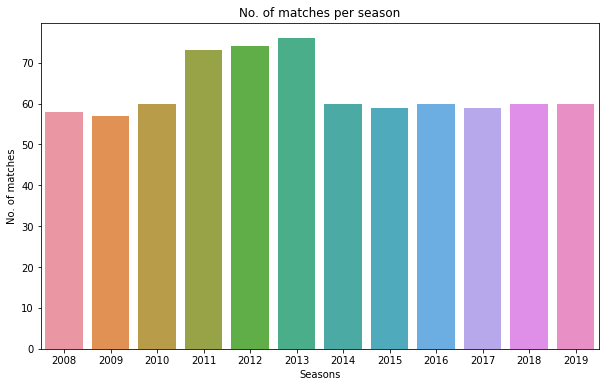

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'season', data = matches_df)
plt.title('No. of matches per season')
plt.xlabel('Seasons')
plt.ylabel('No. of matches')
plt.show()

### Number of wins by a team 

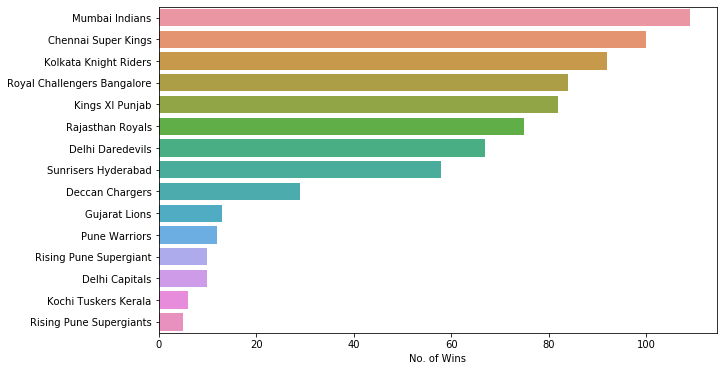

In [34]:
plt.figure(figsize=(10,6))
data = matches_df.winner.value_counts()
sns.barplot(x = data, y = data.index)
plt.xlabel('No. of Wins')
plt.show()

### Man of the match 

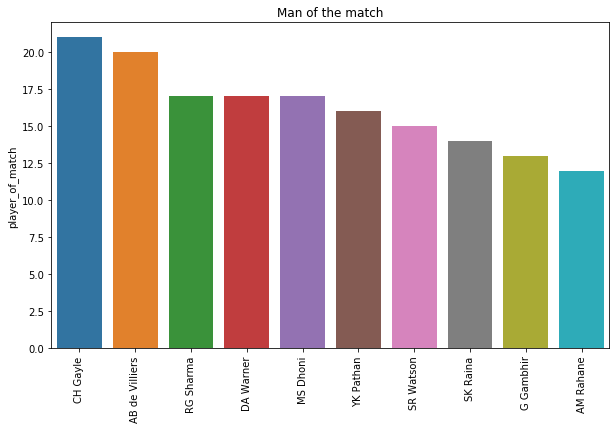

In [35]:
top_player = matches_df.player_of_match.value_counts()[:10]
fig,ax = plt.subplots(figsize=(10,6))
ax.set_ylim([0,22])
ax.set_ylabel('Count')
ax.set_title('Man of the match')
plt.xticks(rotation=90)
sns.barplot(x =top_player.index, y =top_player, orient='v')
plt.show()

### Number of teams participated in each season

Text(0.5, 0, 'Season')

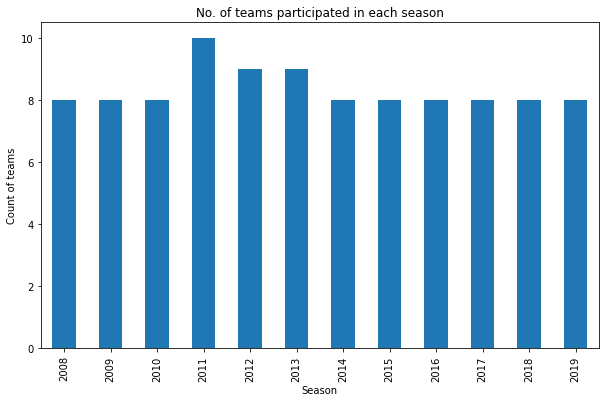

In [36]:
matches_df.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(10,6))
plt.title('No. of teams participated in each season')
plt.ylabel('Count of teams')
plt.xlabel('Season')

### Venue where most number of matches were hosted

Text(0.5, 0, 'Frequency')

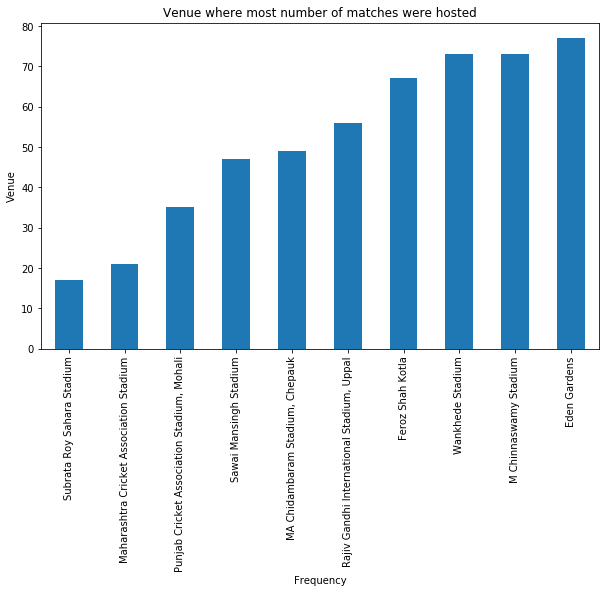

In [37]:
matches_df.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'bar', figsize=(10,6))
plt.title('Venue where most number of matches were hosted')
plt.ylabel('Venue')
plt.xlabel('Frequency')

### Number of matches won by each IPL team

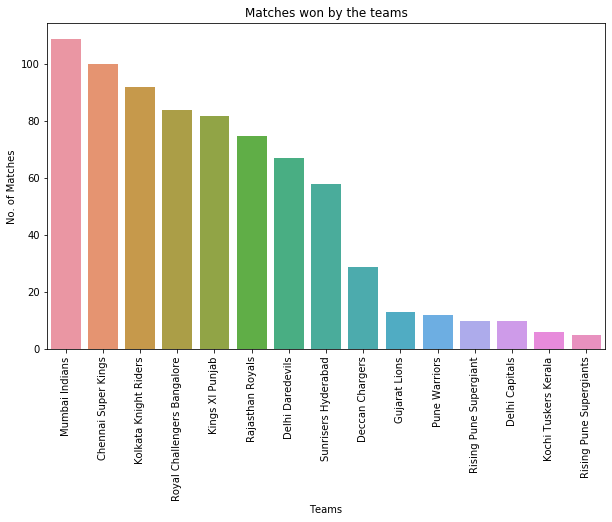

In [38]:
plt.figure(figsize=(10,6))
plt.title('Matches won by the teams')
ax=sns.countplot(x=matches_df['winner'],order = matches_df['winner'].value_counts().index)
ax.set_xlabel('Teams')
ax.set_ylabel('No. of Matches')
plt.xticks(rotation=90)
plt.show()

### Toss Decision

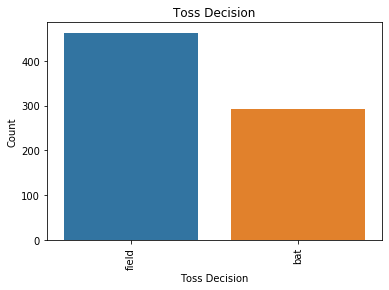

field    463
bat      293
Name: toss_decision, dtype: int64

In [39]:
sns.countplot(matches_df.toss_decision, order=(matches_df.toss_decision.value_counts().index))
plt.title('Toss Decision')
plt.ylabel('Count')
plt.xlabel('Toss Decision')
plt.xticks(rotation=90)
plt.show()
matches_df.toss_decision.value_counts()

### Relationship b/w toss winning & match winning

Text(0, 0.5, 'Frequency')

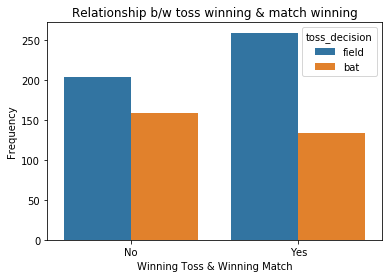

In [40]:
matches_df['toss_win_game_win'] = np.where((matches_df.toss_winner == matches_df.winner),'Yes','No')
plt.figure()
sns.countplot('toss_win_game_win', data=matches_df, hue = 'toss_decision')
plt.title('Relationship b/w toss winning & match winning')
plt.xlabel('Winning Toss & Winning Match')
plt.ylabel('Frequency')

### Toss Decision

Text(0.5, 1.0, 'Decision taken by captain after winning the toss')

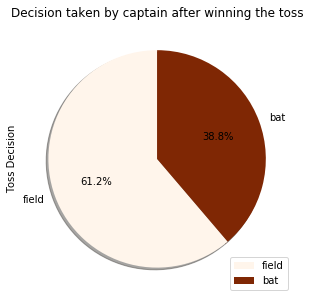

In [41]:
matches_df['toss_decision'].value_counts().plot(kind='pie', autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, startangle=90, legend=True, cmap='Oranges')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captain after winning the toss')

### Toss Decision in different seasons

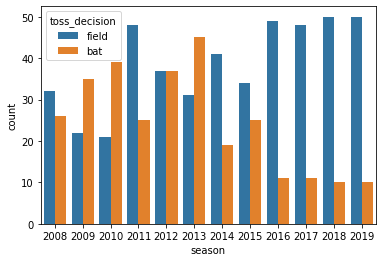

In [42]:
plt.subplots()
sns.countplot(x = 'season', hue = 'toss_decision', data = matches_df)
plt.show()

### Match Result Distribution

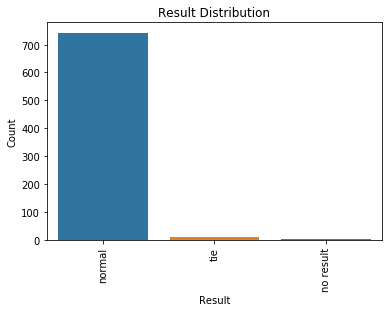

In [43]:
sns.countplot(matches_df.result, order=(matches_df.result.value_counts().index))
plt.ylabel('Count')
plt.xlabel('Result')
plt.title('Result Distribution')
plt.xticks(rotation=90)
plt.show()

### Players Distribution

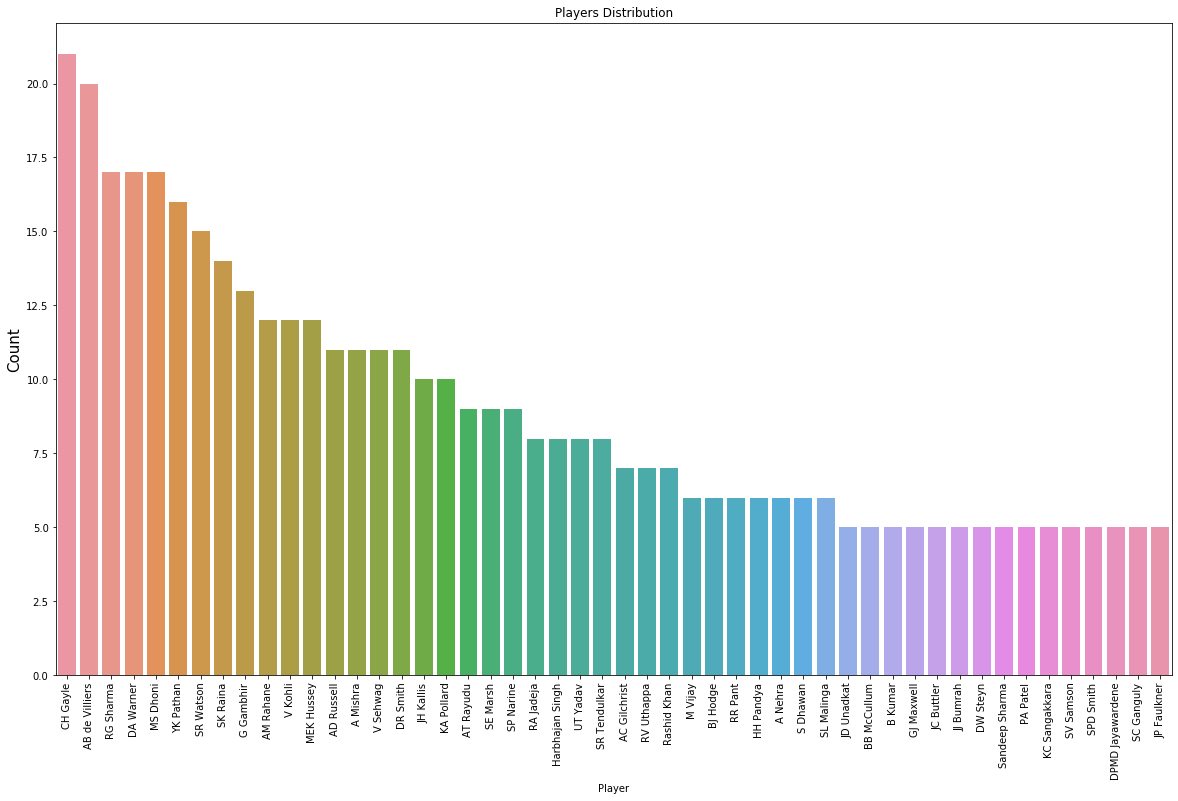

In [44]:
plt.figure(figsize=(20,12))
sns.countplot(matches_df.player_of_match,order=(matches_df.player_of_match.value_counts().head(50).index))
plt.ylabel('Count',fontsize=15)
plt.xlabel('Player')
plt.title('Players Distribution')
plt.xticks(rotation=90)
plt.show()

### Venue Distribution

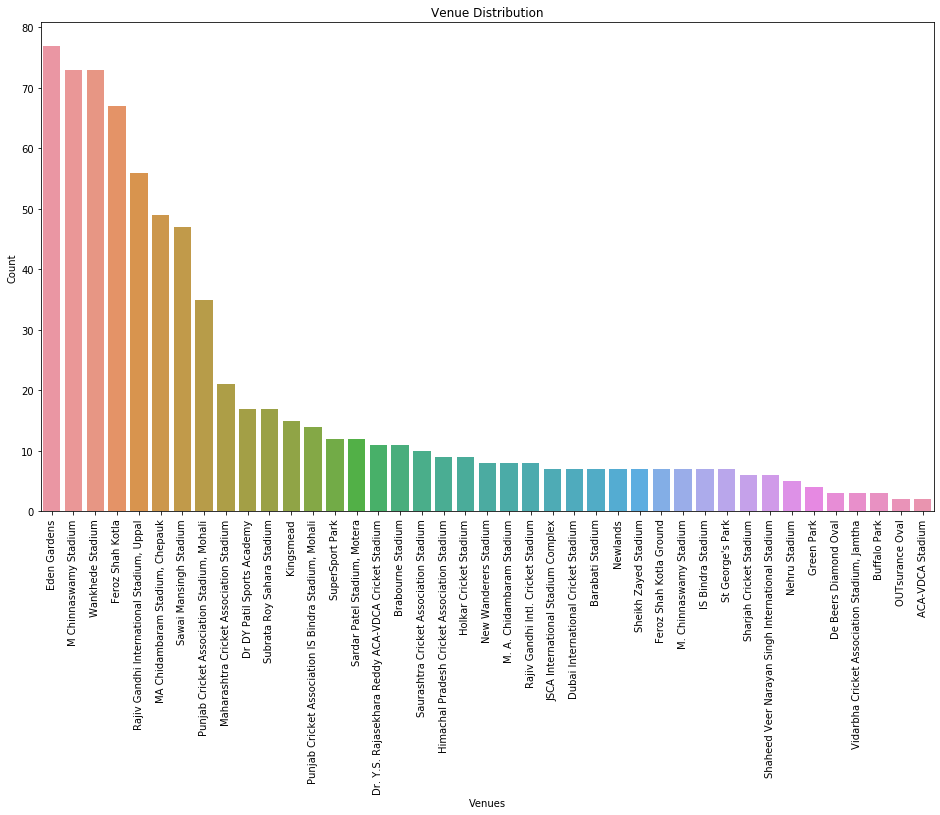

In [45]:
plt.figure(figsize=(16,9))
sns.countplot(matches_df.venue,order=(matches_df.venue.value_counts().index))
plt.ylabel('Count')
plt.xlabel('Venues')
plt.title('Venue Distribution')
plt.xticks(rotation=90)
plt.show()

### How winning matches by fielding first varies across venues

Text(0, 0.5, 'Venue')

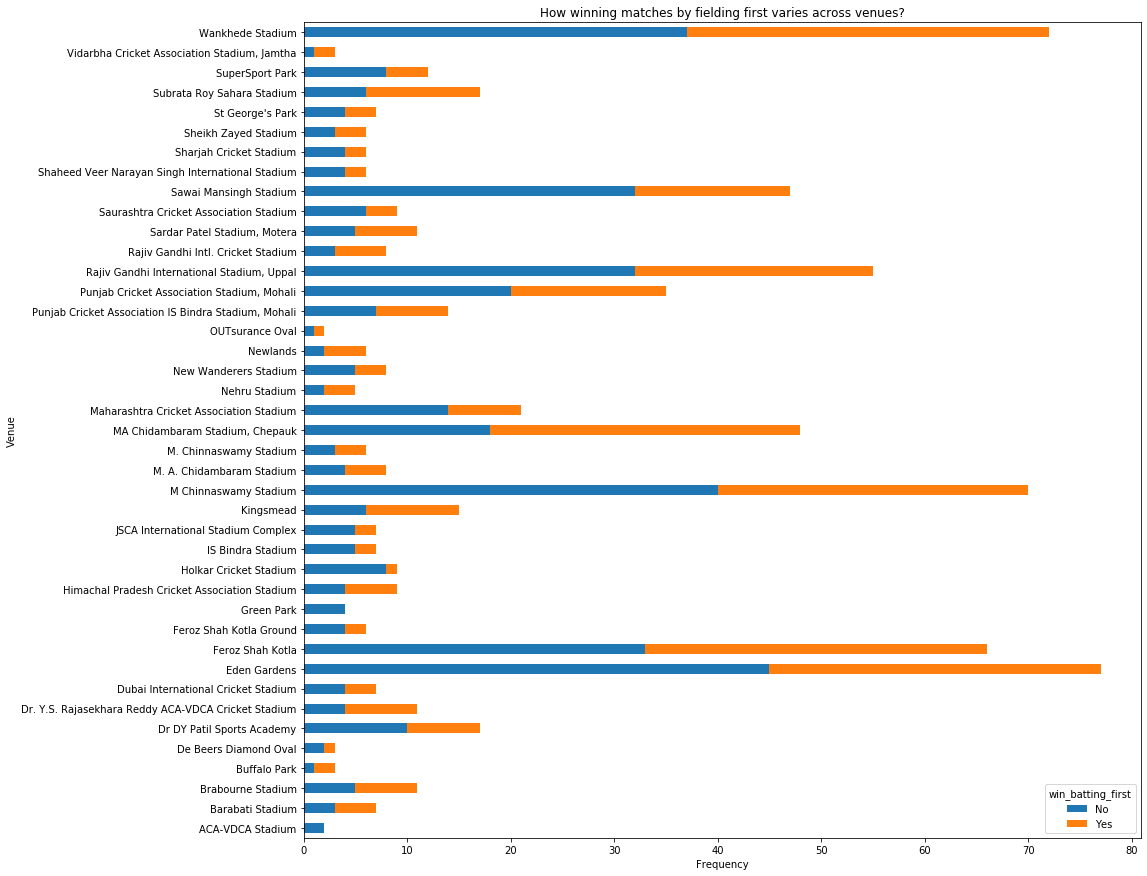

In [46]:
new_matches_df = matches_df[matches_df['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches_df['win_batting_first'] = np.where((new_matches_df.win_by_runs > 0), 'Yes', 'No')
new_matches_df.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,figsize=(15,15))
plt.title('How winning matches by fielding first varies across venues?')
plt.xlabel('Frequency')
plt.ylabel('Venue')

### Whether batting second is advantageous

Text(0, 0.5, 'Count')

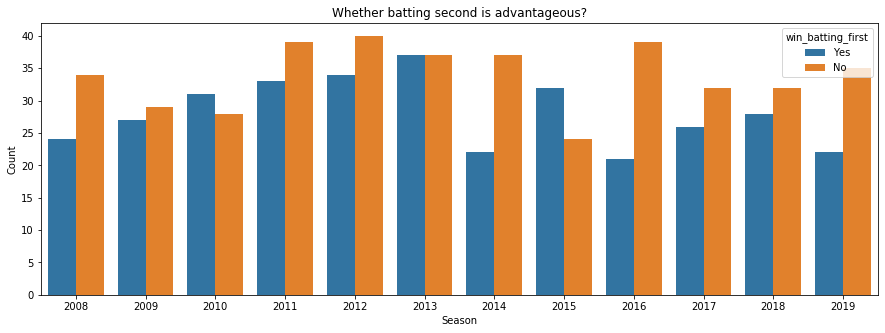

In [47]:
plt.figure(figsize = (15,5))
sns.countplot('season', data = new_matches_df, hue = 'win_batting_first')
plt.title('Whether batting second is advantageous?')
plt.xlabel('Season')
plt.ylabel('Count')

### Bowlers who bowled maximum balls

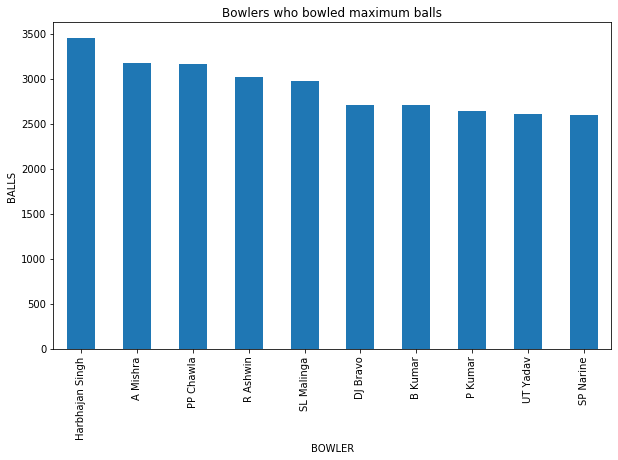

In [48]:
balls = deliveries_df['bowler'].value_counts()[:10]
balls.plot(kind='bar', title='Bowlers who bowled maximum balls', figsize=(10,6))
plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

### Bowlers who have maximum number of Dot balls

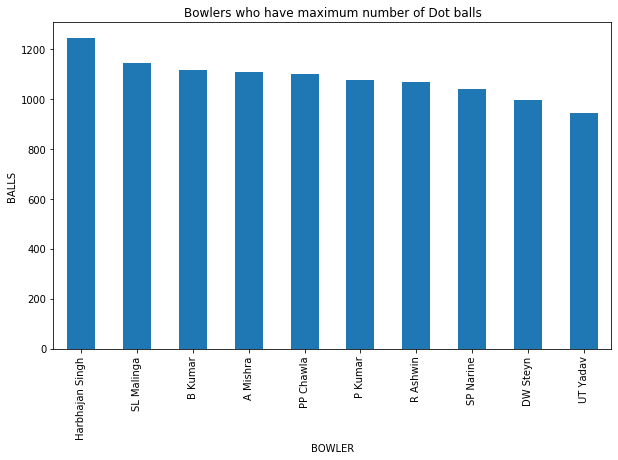

In [49]:
dot_ball = deliveries_df[deliveries_df['total_runs']==0]
dot_ball = dot_ball['bowler'].value_counts()[:10]
dot_ball.plot(kind='bar', figsize=(10,6), title='Bowlers who have maximum number of Dot balls')
plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

### Bowlers who have bowled maximum number of Extra balls

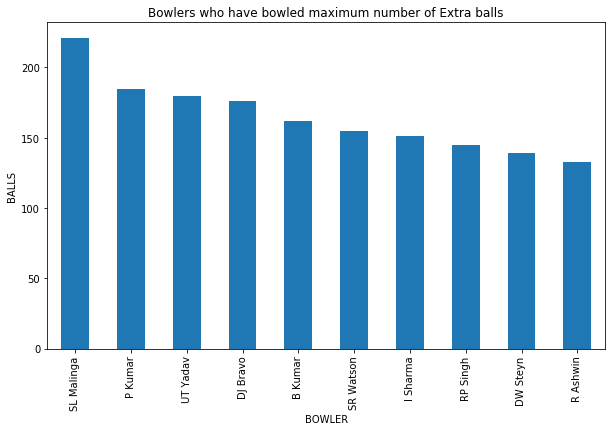

In [50]:
extra = deliveries_df[deliveries_df['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(10,6), title='Bowlers who have bowled maximum number of Extra balls')
plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()